<a href="https://colab.research.google.com/github/chitsikaR/CHTTEN011_FinalYearProject/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/dos_dataset/clean_2.csv")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1245798 non-null  int64  
 1   Unnamed: 0.1                  1245798 non-null  int64  
 2   Unnamed: 0.1.1                1245798 non-null  int64  
 3    Source IP                    1245798 non-null  int64  
 4    Source Port                  1245798 non-null  int64  
 5    Destination IP               1245798 non-null  int64  
 6    Destination Port             1245798 non-null  int64  
 7    Protocol                     1245798 non-null  int64  
 8    Flow Duration                1245798 non-null  int64  
 9    Total Fwd Packets            1245798 non-null  int64  
 10   Total Backward Packets       1245798 non-null  int64  
 11  Total Length of Fwd Packets   1245798 non-null  float64
 12   Total Length of Bwd Packets

In [ ]:
df=df.drop(' Source IP',axis=1)
df=df.drop(' Flow Duration',axis=1)
df=df.drop(' Total Fwd Packets',axis=1)
df=df.drop(' Total Backward Packets',axis=1)
df=df.drop(' Total Length of Bwd Packets',axis=1)
df=df.drop(' Fwd Packet Length Std',axis=1)
df=df.drop(' Flow IAT Max',axis=1)
df=df.drop(' Flow IAT Min',axis=1)
df=df.drop('Fwd IAT Total',axis=1)
df=df.drop(' Fwd IAT Max',axis=1)
df=df.drop(' Fwd IAT Min',axis=1)
df=df.drop('Bwd IAT Total',axis=1)
df=df.drop(' Bwd IAT Mean',axis=1)
df=df.drop(' Bwd IAT Std',axis=1)
df=df.drop(' Bwd IAT Max',axis=1)
df=df.drop(' Bwd IAT Min',axis=1)
df=df.drop(' Fwd Header Length',axis=1)
df=df.drop(' Bwd Header Length',axis=1)
df=df.drop(' Bwd Packets/s',axis=1)
df=df.drop(' SYN Flag Count',axis=1)
df=df.drop(' Down/Up Ratio',axis=1)
df=df.drop(' Fwd Header Length.1',axis=1)
df=df.drop('Subflow Fwd Packets',axis=1)
df=df.drop(' Subflow Bwd Packets',axis=1)
df=df.drop(' Subflow Bwd Bytes',axis=1)
df=df.drop(' act_data_pkt_fwd',axis=1)
df=df.drop(' min_seg_size_forward',axis=1)
df=df.drop('Active Mean',axis=1)
df=df.drop(' Active Std',axis=1)
df=df.drop(' Active Max',axis=1)
df=df.drop(' Active Min',axis=1)
df=df.drop('Idle Mean',axis=1)
df=df.drop(' Idle Max',axis=1)
df=df.drop(' Idle Min',axis=1)
df = df.drop(' Packet Length Std',axis=1)
df = df.drop('Flow Bytes/s',axis=1)
df = df.drop(' Flow Packets/s',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Unnamed: 0.1',axis=1)
df=df.drop('Unnamed: 0.1.1',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  int64  
 1    Destination IP              1245798 non-null  int64  
 2    Destination Port            1245798 non-null  int64  
 3    Protocol                    1245798 non-null  int64  
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [ ]:
df.to_csv('extracted.csv')

In [ ]:
from google.colab import files
files.download('extracted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/dos_dataset/extracted.csv")

In [ ]:
#normalizing the data
normalized_df=(df-df.mean())/df.std()

In [ ]:
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.iloc[:,df.columns != 'Label']
y=df.iloc[:,-1]
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  int64  
 1    Destination IP              1245798 non-null  int64  
 2    Destination Port            1245798 non-null  int64  
 3    Protocol                    1245798 non-null  int64  
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
normalized_df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186983e-12,8.682086e-13,9.755238e-13,-8.253327e-13,-1.077336e-12,2.138927e-12,2.701441e-12,-2.322818e-12,1.352296e-12,7.837405e-13,1.950589e-12,3.237758e-12,1.526851e-12,-1.568473e-12,-7.298400e-13,7.837405e-13,-3.928092e-12,-2.100294e-12,-3.022469e-13,1.306471e-12,-1.186983e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265760e-13,-1.166242e-12,-2.792804e-12,-4.782956e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162110e-01,-2.229338e-01,-2.270074e-01,-2.225459e-01,-9.047062e-02,-1.335889e+00,-9.475020e-01,-9.527515e-01,-9.610563e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-1.822172e+00
25%,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,-1.293230e+00,-4.718853e-01,-4.948748e-01,-4.835507e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-7.310472e-01
50%,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,-4.345006e-01,-4.588845e-01,-4.460175e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-1.854849e-01
75%,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.161664e-01,-2.229338e-01,-2.270051e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,3.280845e-02,1.698744e-02,2.731780e-02,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,9.056397e-01
max,1.737069e+00,2.688699e+00,1.719132e+00,4.8

In [ ]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  float64
 1    Destination IP              1245798 non-null  float64
 2    Destination Port            1245798 non-null  float64
 3    Protocol                    1245798 non-null  float64
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [ ]:

from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=42)
y_train = np.array(y_train)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))

In [ ]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(934348, 34), ytrain=(934348, 1), xtest=(311450, 34), ytest=(311450, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.8754021512281265


In [ ]:
pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Random')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Random
Accuracy =  87.54021512281265
Confusion Matrix =
 [[14234     0     0     0     2     0     0     0]
 [    3 33826     5     0 16083     0     0     0]
 [    1     0 49826    36     8     0     0     0]
 [    1     1    28 49859     6     0   391     6]
 [    1 21332     1    13 25233     0     1    18]
 [    0     0     1     2     1 50174     1     2]
 [    0     0     0   680     6     0 49152    61]
 [    1     0     1     7    21     1    84   340]]
Recall = 0.8754021512281265
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14236
           1       0.61      0.68      0.64     49917
           2       1.00      1.00      1.00     49871
           3       0.99      0.99      0.99     50292
           4       0.61      0.54      0.57     46599
           5       1.00      1.00      1.00     50181
           6       0.99      0.99      0.99     49899
           7       0.80      0.75      0.77     

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

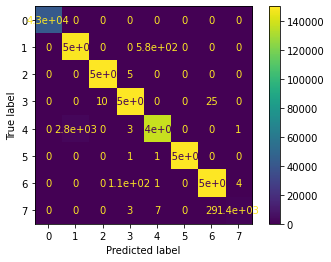

In [ ]:
plot_confusion_matrix(classifier, X_train, y_train)
plt.show()